In [172]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [216]:
train = pd.read_csv('../passing/2000.csv', index_col=[0])

In [ ]:
test = pd.read_csv('../passing/2000.csv', index_col=[0])

In [ ]:
#find the missing school

In [179]:
# create the series 
ser1 = test['school']
ser2 = train['school']
  
# union of the series
union = pd.Series(np.union1d(ser1, ser2))
  
# intersection of the series
intersect = pd.Series(np.intersect1d(ser1, ser2))
  
# uncommon elements in both the series 
notcommonseries = union[~union.isin(intersect)]
  
# displaying the result
print(notcommonseries)

96    Troy
dtype: object


In [180]:
#how many extra teams

In [282]:
len(test_copy['school'].unique())

93

In [275]:
len(train['school'].unique())

93

In [285]:
#remove 2001 worst schools
test_copy= test[(test.school != 'Duke')& (test.school != 'Baylor')& (test.school != 'Oklahoma State')  & (test.school != 'Tulsa')& (test.school != 'Rutgers')& (test.school != 'Houston')& (test.school != 'Ohio')& (test.school != 'Eastern Michigan')& (test.school != 'Navy')]


In [184]:
train_dummies = pd.get_dummies(train, columns=['school','conf'], drop_first=True)

In [185]:
test_dummies = pd.get_dummies(test_copy, columns=['school','conf'], drop_first=True)

### Obtaining best correlations

In [187]:
sale_price_corr = train_dummies.corr()['total_yds']

In [188]:
# Change max number of rows (to 101, for example)
pd.set_option("display.max_rows", 100)

In [189]:
# discover dummy correlations
test = sale_price_corr.sort_values(ascending=False)
test[0:15]

total_yds    1.000000
pass_yds     0.892226
pass_cmp     0.881232
pass_att     0.880021
total_td     0.876946
pass_td      0.861811
pass_rate    0.841311
pass_ay/a    0.839270
pass_y/a     0.839141
pass_pct     0.837351
pass_int     0.824442
rush_att     0.346778
rush_td      0.334917
rush_yds     0.192426
touches      0.182483
Name: total_yds, dtype: float64

### Creating X and y train

In [190]:
X_train = train_dummies.drop(columns=['total_yds','player'])

In [194]:
y_train = train_dummies['total_yds']

### Creating X and y test

In [196]:
X_test = test_dummies.drop(columns=['total_yds','player'])
y_test = test_dummies['total_yds']

In [197]:
# Get the shapes the training and testing subsets
print("X Shapes:")
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")
print(" ")
print("y Shapes:")
print(f"Train: {y_train.shape}")
print(f"Test: {y_test.shape}")

X Shapes:
Train: (637, 149)
Test: (663, 149)
 
y Shapes:
Train: (637,)
Test: (663,)


### Linear Regression model fit

In [198]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [199]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(1.0, 0.9999999999999912)

In [200]:
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

In [201]:
cross_val_predict(estimator=lr, X=X_test, y=y_test)[0:10]

array([-232.5583741 , -211.38694209,  228.73270119, -191.24721778,
       -222.42943042, -198.03834712, -113.43247677, -161.87742733,
        -87.86089459, -262.2137441 ])

### Cross Validation

In [202]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [204]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

-0.22757106234073063

In [205]:
cross_val_predict(estimator=lr, X=X_train, y=y_train)[0:10]

array([-184.74507941,  154.23862202,  -80.21803887,  208.27642847,
       -102.30134645,  649.79490803, -116.07776798,  535.55773277,
        400.88443808, -102.06150581])

## Interpreting Slopes for dummie variables

In [28]:
# features = ['Overall Qual', 'Gr Liv Area','Garage Cars', 'Garage Area','Total Bsmt SF','Garage Cond_TA','Bsmt Cond_Gd','Exter Cond_TA']

In [29]:
list(zip(features, lr.coef_))

[('Overall Qual', 22220.81409721702),
 ('Gr Liv Area', 46.19185930554918),
 ('Garage Cars', 6943.4239197068455),
 ('Garage Area', 46.705384041603764),
 ('Total Bsmt SF', 36.69379693546824),
 ('Garage Cond_TA', -4911.299822331424),
 ('Bsmt Cond_Gd', 5532.293924262402),
 ('Exter Cond_TA', -2587.9909574247285)]

In [30]:
# Use a data frame
pd.DataFrame(lr.coef_, index=features, columns=['Coefficient'])

,Coefficient
Overall Qual,22220.814097
Gr Liv Area,46.191859
Garage Cars,6943.423920
Garage Area,46.705384
Total Bsmt SF,36.693797
Garage Cond_TA,-4911.299822
Bsmt Cond_Gd,5532.293924
Exter Cond_TA,-2587.990957


In [31]:
[f'{X.columns[i]}: {lr.coef_[i]}' for i in range(len(X.columns))]

['Overall Qual: 22220.81409721702',
 'Gr Liv Area: 46.19185930554918',
 'Garage Cars: 6943.4239197068455',
 'Garage Area: 46.705384041603764',
 'Total Bsmt SF: 36.69379693546824',
 'Garage Cond_TA: -4911.299822331424',
 'Bsmt Cond_Gd: 5532.293924262402',
 'Exter Cond_TA: -2587.9909574247285']

## Making predictions

In [212]:
# get predictions from our X data
predictions = lr.predict(X_test)

In [213]:
predictions[0:5]

array([3896.00005007, 2521.        , 3121.99992919, 3042.99998556,
       4905.9999825 ])

In [214]:
#Compare to actual values
y_test.head()

0    3896.0
1    2521.0
2    3122.0
3    3043.0
4    4906.0
Name: total_yds, dtype: float64

### Residuals

In [2]:
# calculate residuals (y - yhat/predicted values)
residuals = y_test - predictions
residuals[0:5]

NameError: name 'y_test' is not defined

In [60]:
round(np.mean(residuals),2)

-0.0

In [61]:
# mean of residuals
residuals.mean()

-8.997233448415962e-14

In [62]:
np.mean(residuals)

-8.997233448415962e-14

## LINE Assumptions 
The assumptions necessary to conduct a proper linear regression are easily remembered by the "LINE" acronym:

* L - Linearity: there is a linear relationship between x and y (fix: apply non-linear transformation)
* I - Independence of residuals (usually assumed)
* N - Normality: residuals are normally distributed (fix: log y variable)
* E - Equality of variance: residuals have constant variance (fix: check outliers, non-linear transformation)

In [40]:
# I assumption:
# true by assumption

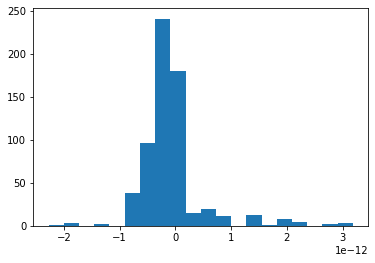

In [63]:
# N assumption:
#Check the normality (of residuals) assumption
plt.hist(residuals, bins = 20);

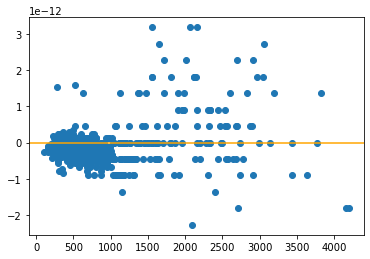

In [64]:
# L and E assumption
# our actual residuals
plt.scatter(predictions, residuals)
plt.axhline(0, color='orange');

### MSE and RMSE

In [65]:
# MSE for training
mean_squared_error(y_true=y_train, y_pred=train_pred)

3.01651201817898e-25

In [66]:
# MSE for testing
mean_squared_error(y_true=y_test, y_pred=test_pred)

3.3903394013352634e-25

In [67]:
# RMSE for training
mean_squared_error(y_true=y_train, y_pred=train_pred, squared = False)

5.492278232372228e-13

In [68]:
# RMSE for testing
mean_squared_error(y_true=y_test, y_pred=test_pred, squared = False)

5.822662107090934e-13

## Coefficient of Determination, $R^2$

In [69]:
# Null prediction
null_prediction = y.mean()

In [70]:
# Null residuals
null_residuals = y - null_prediction

In [71]:
# Null sum of squares
null_ss = (null_residuals ** 2).sum()

In [72]:
null_ss

318324522.3924647

In [73]:
# R2 from model
R2 = round(lr.score(X, y),2)
R2

1.0

In [74]:
# # Adjusted R-squared: Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
n = len(y)
k = len(features)

1 - ((1-R2)*(n-1)/(n-k-1))

NameError: name 'features' is not defined

### Plotting residuals

In [75]:
train_resids = y_train - train_pred
test_resids = y_test - test_pred

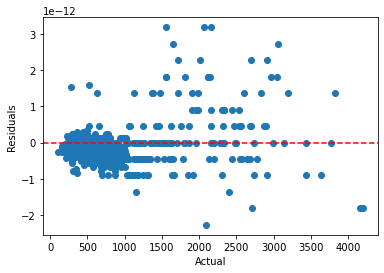

In [76]:
#plt resids
plt.scatter(y_test, test_resids)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.axhline(0, c='red', linestyle='--')

### Plotting true vs. predicted

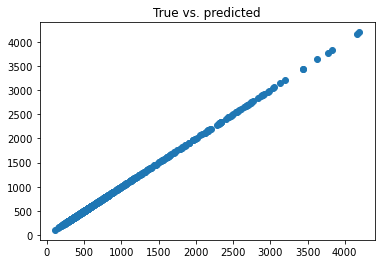

In [77]:
plt.scatter(y_test, test_pred)
plt.title('True vs. predicted');

In [78]:
X_train.head()

,g,pass_cmp,pass_att,pass_pct,pass_yds,pass_y/a,pass_ay/a,pass_td,pass_int,pass_rate,...,conf_Big East,conf_Big Ten,conf_Big West,conf_CUSA,conf_Ind,conf_MAC,conf_MWC,conf_Pac-10,conf_SEC,conf_WAC
602,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
380,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
79,10.0,149.0,260.0,57.3,1617.0,6.2,5.8,6.0,5.0,113.3,...,0,0,0,0,0,0,1,0,0,0
23,11.0,138.0,246.0,56.1,1908.0,7.8,6.9,8.0,8.0,125.5,...,0,0,0,0,0,0,0,0,1,0
199,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


### Export data

In [ ]:
# test_subset = test[X]
# test_preds = lr.predict(test_subset)

In [ ]:
# test['SalePrice'] = test_preds

In [ ]:
# test[['Id', 'SalePrice']].to_csv('submissions/second_model.csv', index=False)